# IA Notebook #2 - Ataques adversarios
Aquí veremos cómo "romper" una red neuronal, usando como ejemplo práctico la IA "Inception V3", la cual es capaz de hacer reconocimiento de imágenes, pudiendo decir alto grado de probabilidad que hay en dicha imágen.

**Nota: Se hizo uso de la versión 1.14.0 de Tensorflow, tener en cuenta antes de ejecutar. También revisar algunas rutas hacia algunos archivos, ya que después de las pruebas realizadas, se hizo una reorganización y se cambió de ruta pero el código no se ha ejecutado, por lo que no es del todo seguro que funcione.**

In [1]:
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
import numpy as np

#Los errores mostrados son por lo que se está haciendo uso de una anterior versión de Tensorflow, no afecta al desarrollo de la actividad.

C:\Users\Moises\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Moises\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Moises\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Moises\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

In [2]:
from keras.applications.inception_v3 import InceptionV3, decode_predictions #Aquí importamos el modelo y una función que nos servirá más adelante.
from keras import backend as k

In [3]:
iv3=InceptionV3()

In [15]:
#Con esto podemos ver un recuentro de todas las capas del modelo
print("Resumen:")
#print(iv3.summary())

Resumen:


In [4]:
from keras.preprocessing import image

#Con esto podemos cargar una imagen usando Keras:
#ximg=image.load_img("./Recursos/Robot_Kuka.jpg")

#Pero para que el modelo lo pueda interpretar, convertimos la imagen a una matriz de números:
x=image.img_to_array(image.load_img("./Recursos/IA Notebook #2/Robot_Kuka.jpg"))

#Con esto podemos ver la forma de la matriz que representa a la imagen:
print(x.shape)

(2440, 1832, 3)


---
#### Analizando
El resultado es:
<p><b>(2440, 1832, 3)</b></p>
Dónde el primero número representa el alto de la foto, el segundo el ancho y el tercero la profundidad de bit en número de canales, para este caso, los canales son RGB y es por eso que sale 3

Pero hay que aclarar que es una matriz y por lo tanto, cada pixel está representado como elemento de dicha matriz.

---
### Continuando...
El modelo InceptionV3 requiere que la matriz cumpla cierto requisitos determinados, como por ejemplo:
- La imagen tiene que ser de una proporción de 299x299 pixeles
- El rango en que varía el elemento de la matriz tiene que ser entre -1 y 1
- Es necesario una dimension adicional que represente la cantidad de imagenes que se le van a dar como entrada al modelo

_El rango representa la intensidad de cada pixel en la imagen._

In [6]:
#Por lo indicado anteriormente, se reescribirá la variable ximg:
x=image.img_to_array(image.load_img("./Recursos/IA Notebook #2/Robot_Kuka.jpg",target_size=(299, 299)))

print("La forma de la nueva matriz es: ",x.shape)

#Ahora cambiamos el rango de intensidad de cada pixel:
x=((x/255)-0.5)*2 #Con esto lo convertimos todo a rango de -1 a 1

#Le asignamos la dimensión adicional que representa la cantidad de imagenes:
x=x.reshape([1, x.shape[0], x.shape[1], x.shape[2]])
print("Forma de la nueva matriz ya lista para el modelo: ",x.shape)

La forma de la nueva matriz es:  (299, 299, 3)
Forma de la nueva matriz ya lista para el modelo:  (1, 299, 299, 3)


In [7]:
#Momento de la verdad, ahora vamos a ingresar nuestra matriz al modelo:
y=iv3.predict(x)

In [8]:
#Debido a la cantidad de clases que tiene el modelo
#y que el modelo mismo le asigna una probabilidad a cada clase
#es que se espera una matriz de una tamaño de mil:

print("Tamaño o forma del resultado: ",y.shape)
#print("------------------------------\n El resultado como tal es:\n",y)

Tamaño o forma del resultado:  (1, 1000)


In [9]:
decode_predictions(y)

[[('n03995372', 'power_drill', 0.39098394),
  ('n03109150', 'corkscrew', 0.054802377),
  ('n03483316', 'hand_blower', 0.039984133),
  ('n03208938', 'disk_brake', 0.017700238),
  ('n04286575', 'spotlight', 0.0142612215)]]

## Inicio de la Mini Sección de Practica

In [30]:
#Repitiendo el proceso pero más rápido y evaluando dos fotos por separado:

#Ingresamos y converimos imagen a matriz:
x2=image.img_to_array(image.load_img("./Recursos/IA Notebook #2/Robot_Kuka_hacked.png"))
#Ya no se hizo el redimensionamiento porque la imagen ya está con las dimensiones adecuadas.

#Ahora cambiamos el rango de intensidad de cada pixel:
x2=((x2/255)-0.5)*2 #Con esto lo convertimos todo a rango de -1 a 1

#Le asignamos la dimensión adicional que representa la cantidad de imagenes:
x2=x2.reshape([1, x2.shape[0], x2.shape[1], x2.shape[2]])
print("Forma de la nueva matriz ya lista para el modelo: ",x2.shape)

y2=iv3.predict(x2)
decode_predictions(y2)

Forma de la nueva matriz ya lista para el modelo:  (1, 299, 299, 3)


[[('n07749582', 'lemon', 0.9945656),
  ('n07747607', 'orange', 0.0015342057),
  ('n09229709', 'bubble', 0.0014557193),
  ('n04509417', 'unicycle', 0.00055174314),
  ('n07753592', 'banana', 0.00023650152)]]

In [11]:
x3=image.img_to_array(image.load_img("./Recursos/IA Notebook #2/persona4.jpg",target_size=(299, 299)))

x3=((x3/255)-0.5)*2

x3=x3.reshape([1, x3.shape[0], x3.shape[1], x3.shape[2]])
print("Forma de la nueva matriz ya lista para el modelo: ",x3.shape)

y3=iv3.predict(x3)
decode_predictions(y3)

Forma de la nueva matriz ya lista para el modelo:  (1, 299, 299, 3)


[[('n02786058', 'Band_Aid', 0.078878045),
  ('n03982430', 'pool_table', 0.059184298),
  ('n03838899', 'oboe', 0.04990664),
  ('n03595614', 'jersey', 0.044796944),
  ('n04584207', 'wig', 0.030533424)]]

## Fin de la Mini Sección de Practica
Y continuando...

# Ataque Adversario
Lo que ahora haremos primero será seleccionar la entrada de la primera capa y la salidad de la última capa de nuestro modelo InceptioV3.
Luego definimos la clase objetivo (target_class) a la que queremos llegar, modificando nuestra imagen inicial almacenada en "x", de esta manera estaremos engañando al modelo, haciendole pensar que la imagen es de la clase que hemos definido.

También definimos una función de coste (loss), teniendo en cuenta que la última capa de nuestra red (o modelo) es la que nos da las probabilidades de que sea una clase u otra.
<b>Aún no encuentro el significado sobre lo que se está haciendo con la función de coste, según dotCSV es una "función" pero en términos informáticos como enfocamos los valores dados en los corchetes?</b>

_"Con esto le estamos diciendo, es que nuestra función de coste que queremos maximizar es el resultado, la probabilidad de la clase 951, es decir, de todo el vector de probabilidades que nos proporciona, queremos que esa sea la clase maximizada."_

Luego se crea la variable "grad" de gradiente, para almacenar el tensor cuyos valores nos dirán en que proporción tienen que variar los pixeles de nuestra imagen para que poco a poco la función de coste se vaya optimizando.
La función "k.gradients" lo que hace es justamente aplicar ese método o algoritmo del "descenso del gradiente", con lo cual, nos dará como resultado una matriz y por razones no del todo claras, solo usaremos el primer elemento de dicha matriz.

Ahora será necesario crear la función que se encargará de hacer este proceso del gradiente de manera iterativa (en bucle) y para ello se hace uso de la función Keras, y lo que se le suministra a está tipo de funciones es, por un lado, los valores que le vamos a dar de entrada y por otro lado, cuales son los resultados que esperamos como salida, y automáticamente crea todo el grafo necesario para realizar esa función.

Por último, hacemos tres "sencillos" pasos, el primero es hacer una copia de nuestra variable x, y la segunda es crear una variable de coste la cual nos dirá si ya hemos llegado o no a nuestro objetivo, y la tercera es crear el bucle while dónde nuestra condición será la variable de coste, y este bucle ejecutará sin parar la función de optimizaciónd el gradiente, además de que se lo ira sumando a nuestra variable para ir modificando la copia de nuestra imagen.

In [24]:
in_layer=iv3.layers[0].input
out_layer=iv3.layers[-1].output

#Las salida son tensores:
#print(in_layer)
#print(out_layer)

#Clase objetivo
target_class=951 #La clase limnón está referenciada por este número.

#Función de coste:
loss=out_layer[0, target_class] #Aún no encuentro como funciona esto, si son parámetros o la forma de acceder a una matriz.

#Gradiente o descenso del gradiente
grad=k.gradients(loss, in_layer)[0]

#Gradiente optimizado u optimizo gradiente
optimize_gradient=k.function([in_layer, k.learning_phase()], [grad, loss])
#Para el caso de Keras, es necesario decirle en la parte de entrada la acción que estás queriendo realizar, si vas a entrenar o vas a testear.
#Y en nuestro caso es la de entrenar, por eso usamos "k.learning_phase()"

#Copia de la variable x en la variable adv, es solo para poder salvaguardar la original.
adv=np.copy(x)

#--------------------------------------------------------------------------------------
#Esto sección es para definir los valores límite de cuanto puede modificar y no, nuestros valores para llegar al resultado de imagen adversaria.
perturbacion=0.01

max_pert = x+0.01
min_pert = x-0.01
#--------------------------------------------------------------------------------------

#Variable de coste
cost=0.0

#Bucle iterativo
while cost<0.95:
    #Ya que nuestra función Keras, le hemos dicho antes que nos devuelva dos salidas, [grad, loss], es que tenemos:
    gr, cost = optimize_gradient([adv, 0])
    
    #Aquí le sumamos a nuestra imagen, las variaciones que tiene que sufrir.
    adv += gr
    
    #--------------------------------------------------------------------------------------
    #Ahora, con los valroes limites establecidos, hacemos:
    adv = np.clip(adv, min_pert, max_pert)
    adv = np.clip(adv, -1, 1) #Esto es para asegurarnos de que siempre esté dentro de los valores que pueda procesar el modelo.
    #--------------------------------------------------------------------------------------
    
    #Vamos viendo como se comporta nuestra función de coste y si va aumentando:
    print("Costo objetivo o target cost: ", cost)

#Guaramos una copia del resultado, el cual es un tensor.
hacked = np.copy(adv)

Costo objetivo o target cost:  0.000101386424
Costo objetivo o target cost:  0.000101713296
Costo objetivo o target cost:  0.00010210419
Costo objetivo o target cost:  0.000102570404
Costo objetivo o target cost:  0.000103057064
Costo objetivo o target cost:  0.00010354299
Costo objetivo o target cost:  0.00010403965
Costo objetivo o target cost:  0.000104542625
Costo objetivo o target cost:  0.00010504624
Costo objetivo o target cost:  0.00010555655
Costo objetivo o target cost:  0.000106069616
Costo objetivo o target cost:  0.00010658538
Costo objetivo o target cost:  0.0001071011
Costo objetivo o target cost:  0.00010761904
Costo objetivo o target cost:  0.00010814476
Costo objetivo o target cost:  0.00010868336
Costo objetivo o target cost:  0.00010922961
Costo objetivo o target cost:  0.00010977617
Costo objetivo o target cost:  0.00011032877
Costo objetivo o target cost:  0.00011087107
Costo objetivo o target cost:  0.00011139239
Costo objetivo o target cost:  0.000111903166
Cost

In [25]:
adv = ((adv/2)+0.5)*255

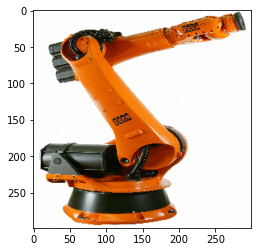

In [26]:
plt.imshow(adv[0].astype(np.uint8)) #Aquí convertimos los números de la matriz en valores enteros.
plt.show()

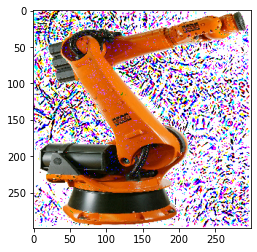

In [14]:
#Esto es solo para mantener el resultado anterior:
#plt.imshow(adv[0].astype(np.uint8)) #Aquí convertimos los números de la matriz en valores enteros.
#plt.show()

In [29]:
from PIL import Image

img_generada=Image.fromarray(adv[0].astype(np.uint8))

img_generada.save("./Recursos/IA Notebook #2/Robot_Kuka_hacked.png")